In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("ai_job_trends_dataset.csv")
df

,Job Title,Industry,Job Status,AI Impact Level,Median Salary (USD),Required Education,Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),Automation Risk (%),Location,Gender Diversity (%)
0,Investment analyst,IT,Increasing,Moderate,42109.76,Master’s Degree,5,1515,6342,55.96,28.28,UK,44.63
1,"Journalist, newspaper",Manufacturing,Increasing,Moderate,132298.57,Master’s Degree,15,1243,6205,16.81,89.71,USA,66.39
2,Financial planner,Finance,Increasing,Low,143279.19,Bachelor’s Degree,4,3338,1154,91.82,72.97,Canada,41.13
3,Legal secretary,Healthcare,Increasing,High,97576.13,Associate Degree,15,7173,4060,1.89,99.94,Australia,65.76
4,Aeronautical engineer,IT,Increasing,Low,60956.63,Master’s Degree,13,5944,7396,53.76,37.65,Germany,72.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,"Psychotherapist, dance movement",Education,Increasing,Moderate,142238.00,PhD,16,7816,1363,56.91,27.27,China,65.90
29996,"Scientist, water quality",IT,Decreasing,Moderate,123107.50,Associate Degree,19,9358,7632,27.25,12.84,UK,31.18
29997,Web designer,Manufacturing,Decreasing,Moderate,97305.51,Master’s Degree,0,9605,2559,31.76,16.82,China,26.07
29998,Primary school teacher,Entertainment,Increasing,Moderate,95599.22,High School,15,5481,4879,32.46,45.93,Brazil,40.43


In [5]:
print("Dataset preview: ")
print(df.head())

Dataset preview: 
               Job Title       Industry  Job Status AI Impact Level  \
0     Investment analyst             IT  Increasing        Moderate   
1  Journalist, newspaper  Manufacturing  Increasing        Moderate   
2      Financial planner        Finance  Increasing             Low   
3        Legal secretary     Healthcare  Increasing            High   
4  Aeronautical engineer             IT  Increasing             Low   

   Median Salary (USD) Required Education  Experience Required (Years)  \
0             42109.76    Master’s Degree                            5   
1            132298.57    Master’s Degree                           15   
2            143279.19  Bachelor’s Degree                            4   
3             97576.13   Associate Degree                           15   
4             60956.63    Master’s Degree                           13   

   Job Openings (2024)  Projected Openings (2030)  Remote Work Ratio (%)  \
0                 1515            

In [6]:
print(df.dtypes)

Job Title                       object
Industry                        object
Job Status                      object
AI Impact Level                 object
Median Salary (USD)            float64
Required Education              object
Experience Required (Years)      int64
Job Openings (2024)              int64
Projected Openings (2030)        int64
Remote Work Ratio (%)          float64
Automation Risk (%)            float64
Location                        object
Gender Diversity (%)           float64
dtype: object


In [7]:
number_column = df.select_dtypes(include=['int64','float64']).columns.tolist()
Categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

In [8]:
print("\n numeric columns: ")
print(number_column)


 numeric columns: 
['Median Salary (USD)', 'Experience Required (Years)', 'Job Openings (2024)', 'Projected Openings (2030)', 'Remote Work Ratio (%)', 'Automation Risk (%)', 'Gender Diversity (%)']


In [9]:
print("\n categorical columns: ")
print(Categorical_columns)


 categorical columns: 
['Job Title', 'Industry', 'Job Status', 'AI Impact Level', 'Required Education', 'Location']


In [10]:
print("Missing values before cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
Job Title                      0
Industry                       0
Job Status                     0
AI Impact Level                0
Median Salary (USD)            0
Required Education             0
Experience Required (Years)    0
Job Openings (2024)            0
Projected Openings (2030)      0
Remote Work Ratio (%)          0
Automation Risk (%)            0
Location                       0
Gender Diversity (%)           0
dtype: int64


In [11]:
df['Median Salary (USD)'] = pd.to_numeric(df['Median Salary (USD)'], errors='coerce')
print(df['Median Salary (USD)'])

0         42109.76
1        132298.57
2        143279.19
3         97576.13
4         60956.63
           ...    
29995    142238.00
29996    123107.50
29997     97305.51
29998     95599.22
29999     65679.61
Name: Median Salary (USD), Length: 30000, dtype: float64


In [12]:
print(df.isnull().sum())

Job Title                      0
Industry                       0
Job Status                     0
AI Impact Level                0
Median Salary (USD)            0
Required Education             0
Experience Required (Years)    0
Job Openings (2024)            0
Projected Openings (2030)      0
Remote Work Ratio (%)          0
Automation Risk (%)            0
Location                       0
Gender Diversity (%)           0
dtype: int64


In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
df['Median Salary (USD)'] = pd.to_numeric(df['Median Salary (USD)'], errors='coerce')
df['Median Salary (USD)'].fillna(df['Median Salary (USD)'].mean(), inplace=True)
df.dropna(inplace=True)

/tmp/ipython-input-3920622436.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Median Salary (USD)'].fillna(df['Median Salary (USD)'].mean(), inplace=True)


In [14]:
numeric_columns = ['Median Salary (USD)', 'Experience Required (Years)', 'Job Openings (2024)', 'Projected Openings (2030)', 'Remote Work Ratio (%)', 'Automation Risk (%)', 'Gender Diversity (%)']
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [15]:
print("Rescaled Data:")
print(df[numeric_columns].head())

Rescaled Data:
   Median Salary (USD)  Experience Required (Years)  Job Openings (2024)  \
0            -1.395182                    -0.833491            -1.231978   
1             1.225715                     0.816517            -1.327050   
2             1.544813                    -0.998491            -0.594779   
3             0.216677                     0.816517             0.745679   
4            -0.847490                     0.486516             0.316103   

   Projected Openings (2030)  Remote Work Ratio (%)  Automation Risk (%)  \
0                   0.442275               0.211404            -0.760726   
1                   0.394481              -1.140171             1.375642   
2                  -1.367596               1.449398             0.793470   
3                  -0.353817              -1.655254             1.731413   
4                   0.809970               0.135453            -0.434863   

   Gender Diversity (%)  
0             -0.309688  
1              0.94

In [16]:
import pandas as pd

df = pd.read_csv("ai_job_trends_dataset.csv")

X = df[["Experience Required (Years)"]]
y = df["Median Salary (USD)"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)

In [20]:
slope = model.coef_[0]
intercept = model.intercept_
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [21]:
print("\n  Simple Linear Regression Results  ")
print(f"Equation: Median Salary = {intercept:.2f} + {slope:.2f} × (Experience in Years)")
print(f"Slope (Coefficient): {slope}")
print(f"Intercept: {intercept}")
print(f"R² Score: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")


  Simple Linear Regression Results  
Equation: Median Salary = 89932.65 + 5.22 × (Experience in Years)
Slope (Coefficient): 5.21873807347348
Intercept: 89932.6504857524
R² Score: -0.0003609687543821849
Mean Squared Error: 1185863959.82039
Mean Absolute Error: 29823.573179354855


In [22]:
comparison_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})
print("\n  Actual vs Predicted (first 10)  ")
print(comparison_df.head(10))


  Actual vs Predicted (first 10)  
      Actual     Predicted
0  121278.59  89932.650486
1  118944.32  89979.619128
2   95884.27  90010.931557
3  139808.82  89974.400390
4   51687.18  90010.931557
5  142012.17  89963.962914
6  131878.57  90010.931557
7  132462.80  89963.962914
8   65471.32  89990.056605
9   60548.87  90016.150295


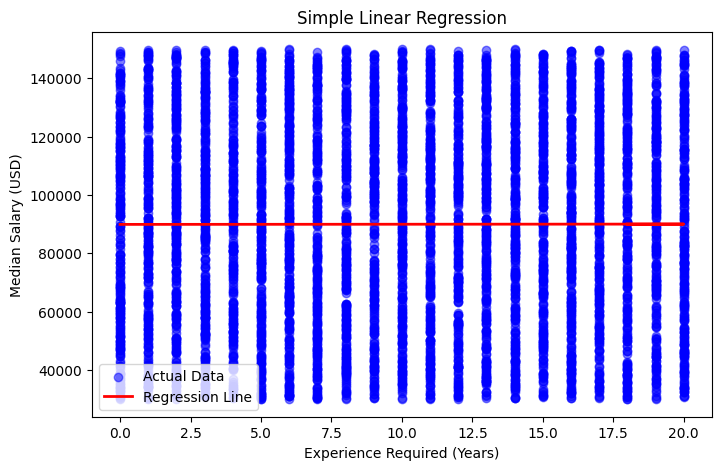

In [23]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Experience Required (Years)")
plt.ylabel("Median Salary (USD)")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

df = pd.read_csv("ai_job_trends_dataset.csv")

X = df[["Job Openings (2024)"]].values
y = df["Projected Openings (2030)"].values

lin_model = LinearRegression()
lin_model.fit(X, y)
y_pred_lin = lin_model.predict(X)


# Check X and y values
print("\nFirst 5 X values:\n", X[:5])
print("\nFirst 5 y values:\n", y[:5])


First 5 X values:
 [[1515]
 [1243]
 [3338]
 [7173]
 [5944]]

First 5 y values:
 [6342 6205 1154 4060 7396]


In [25]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_pred_poly = poly_model.predict(X_poly)

In [26]:
r2_poly = r2_score(y, y_pred_poly)
mse_poly = mean_squared_error(y, y_pred_poly)
mae_poly = mean_absolute_error(y, y_pred_poly)

In [27]:
print("   Polynomial Regression (Degree=3)  ")
print("Coefficients:", poly_model.coef_)
print("Intercept:", poly_model.intercept_)
print(f"R² Score: {r2_poly}")
print(f"Mean Squared Error: {mse_poly}")
print(f"Mean Absolute Error: {mae_poly}")

   Polynomial Regression (Degree=3)  
Coefficients: [ 0.00000000e+00 -1.22819221e-01  2.36604960e-05 -1.30145908e-09]
Intercept: 5226.422267783905
R² Score: 0.00017767551018166294
Mean Squared Error: 8215379.206446547
Mean Absolute Error: 2487.5684820328725


In [28]:
X_sorted = np.sort(X, axis=0)
plt.figure(figsize=(8, 5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

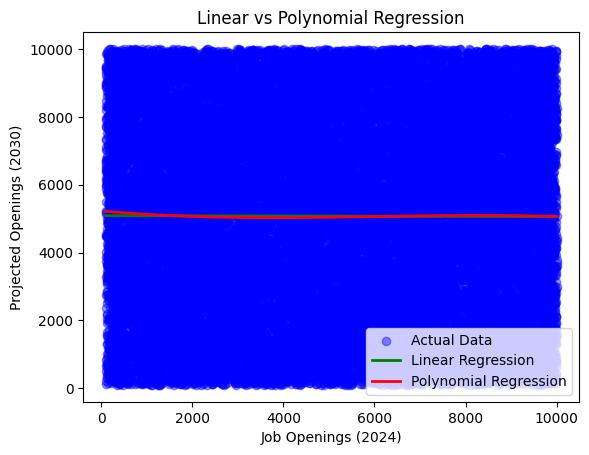

In [29]:
plt.scatter(X, y, color='blue', alpha=0.4, label='Actual Data')

plt.plot(X_sorted, lin_model.predict(X_sorted), color='green', linewidth=2, label='Linear Regression')

plt.plot(X_sorted, poly_model.predict(poly.transform(X_sorted)), color='red', linewidth=2, label='Polynomial Regression')

plt.xlabel("Job Openings (2024)")
plt.ylabel("Projected Openings (2030)")
plt.title("Linear vs Polynomial Regression")
plt.legend()
plt.show()

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = pd.read_csv("ai_job_trends_dataset.csv")

print(df.dtypes)

Job Title                       object
Industry                        object
Job Status                      object
AI Impact Level                 object
Median Salary (USD)            float64
Required Education              object
Experience Required (Years)      int64
Job Openings (2024)              int64
Projected Openings (2030)        int64
Remote Work Ratio (%)          float64
Automation Risk (%)            float64
Location                        object
Gender Diversity (%)           float64
dtype: object


In [31]:
print("\n  First 5 Rows ")
print(df.head())


  First 5 Rows 
               Job Title       Industry  Job Status AI Impact Level  \
0     Investment analyst             IT  Increasing        Moderate   
1  Journalist, newspaper  Manufacturing  Increasing        Moderate   
2      Financial planner        Finance  Increasing             Low   
3        Legal secretary     Healthcare  Increasing            High   
4  Aeronautical engineer             IT  Increasing             Low   

   Median Salary (USD) Required Education  Experience Required (Years)  \
0             42109.76    Master’s Degree                            5   
1            132298.57    Master’s Degree                           15   
2            143279.19  Bachelor’s Degree                            4   
3             97576.13   Associate Degree                           15   
4             60956.63    Master’s Degree                           13   

   Job Openings (2024)  Projected Openings (2030)  Remote Work Ratio (%)  \
0                 1515             

In [32]:
number_column = df.select_dtypes(include=['int64','float64']).columns.tolist()
Categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

In [33]:
print("\n categorical columns: ")
print(Categorical_columns)


 categorical columns: 
['Job Title', 'Industry', 'Job Status', 'AI Impact Level', 'Required Education', 'Location']


In [34]:
print("Missing values before cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
Job Title                      0
Industry                       0
Job Status                     0
AI Impact Level                0
Median Salary (USD)            0
Required Education             0
Experience Required (Years)    0
Job Openings (2024)            0
Projected Openings (2030)      0
Remote Work Ratio (%)          0
Automation Risk (%)            0
Location                       0
Gender Diversity (%)           0
dtype: int64


In [35]:
features = ["Experience Required (Years)", "Job Openings (2024)",
            "Remote Work Ratio (%)", "Automation Risk (%)", "Gender Diversity (%)"]
X = df[features]
y = df["Median Salary (USD)"]

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [37]:
print("\n      Multiple Linear Regression Results     ")
print("Intercept:", model.intercept_)
print("Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"  {feature}: {coef}")


      Multiple Linear Regression Results     
Intercept: 88632.46529916019
Coefficients:
  Experience Required (Years): 5.697772132754781
  Job Openings (2024): 0.012739318424647372
  Remote Work Ratio (%): -7.718358202890974
  Automation Risk (%): 9.198975661399173
  Gender Diversity (%): 23.086658113880652


In [38]:

print(f"\nR² Score: {r2_score(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")


R² Score: -0.0002558323748775848
Mean Squared Error: 1185739327.3654914
Mean Absolute Error: 29816.572886752943


In [39]:
comparison_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})
print("\n       Actual vs Predicted (first 10)     ")
print(comparison_df.head(10))


       Actual vs Predicted (first 10)     
      Actual     Predicted
0  121278.59  89182.198074
1  118944.32  90347.175104
2   95884.27  89900.483664
3  139808.82  89987.251117
4   51687.18  89827.509147
5  142012.17  89545.440523
6  131878.57  90804.115987
7  132462.80  90180.694210
8   65471.32  89381.293843
9   60548.87  88795.093621


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

df = pd.read_csv("ai_job_trends_dataset.csv")

X = df[["Job Openings (2024)"]].values
y = df["Projected Openings (2030)"].values

In [41]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

In [42]:
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_scaled, y_scaled)

SVR(C=100, gamma=0.1)

In [43]:
y_pred_scaled = svr.predict(X_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

In [44]:
print("   SVR Results   ")
print(f"R² Score: {r2_score(y, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y, y_pred)}")

   SVR Results   
R² Score: 0.00021726826933154975
Mean Squared Error: 8215053.8791136015
Mean Absolute Error: 2487.0026195331584


In [45]:
X_sorted = np.sort(X, axis=0)
X_sorted_scaled = scaler_X.transform(X_sorted)
y_sorted_pred_scaled = svr.predict(X_sorted_scaled)
y_sorted_pred = scaler_y.inverse_transform(y_sorted_pred_scaled.reshape(-1, 1)).ravel()

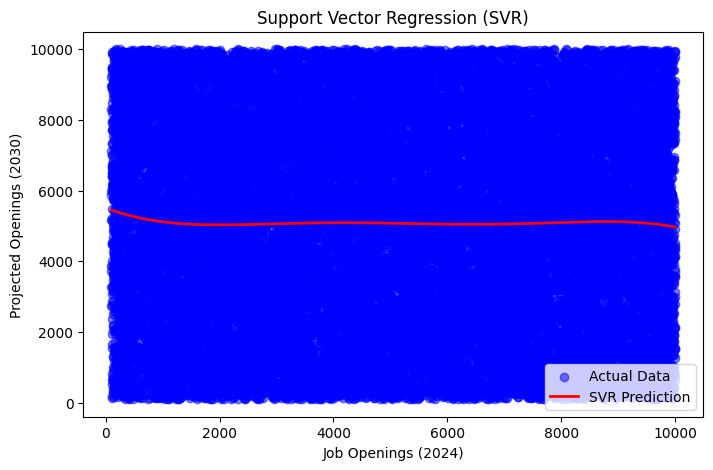

In [46]:
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', alpha=0.5, label='Actual Data')
plt.plot(X_sorted, y_sorted_pred, color='red', linewidth=2, label='SVR Prediction')
plt.xlabel("Job Openings (2024)")
plt.ylabel("Projected Openings (2030)")
plt.title("Support Vector Regression (SVR)")
plt.legend()
plt.show()

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

df = pd.read_csv("ai_job_trends_dataset.csv")

X = df[["Job Openings (2024)"]].values
y = df["Projected Openings (2030)"].values

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

In [48]:
knn = KNeighborsRegressor(n_neighbors=10, weights='distance', metric='euclidean')
knn.fit(X_scaled, y)

KNeighborsRegressor(metric='euclidean', n_neighbors=10, weights='distance')

In [49]:
X_sorted = np.sort(X, axis=0)
X_sorted_scaled = scaler_X.transform(X_sorted)
y_pred_sorted = knn.predict(X_sorted_scaled)
y_pred_all = knn.predict(X_scaled)

In [50]:
print("=== KNN Regression (Single Feature) ===")
print(f"R² Score: {r2_score(y, y_pred_all)}")
print(f"Mean Squared Error: {mean_squared_error(y, y_pred_all)}")
print(f"Mean Absolute Error: {mean_absolute_error(y, y_pred_all)}")

=== KNN Regression (Single Feature) ===
R² Score: 0.3179323736424401
Mean Squared Error: 5604439.966698617
Mean Absolute Error: 1916.2438935714285


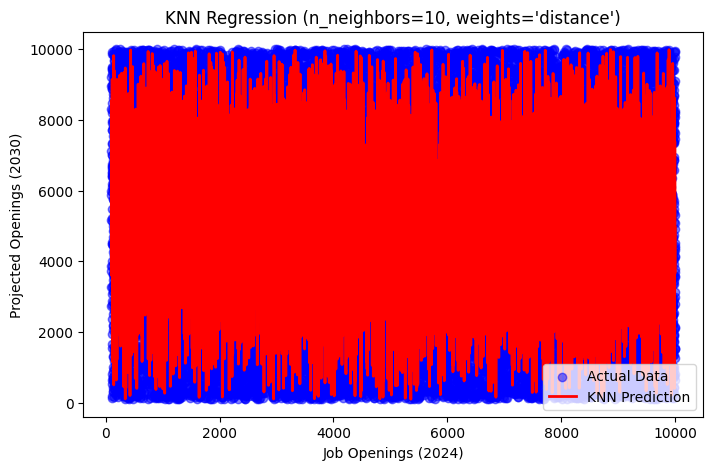

In [51]:
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', alpha=0.5, label='Actual Data')
plt.plot(X_sorted, y_pred_sorted, color='red', linewidth=2, label='KNN Prediction')
plt.xlabel("Job Openings (2024)")
plt.ylabel("Projected Openings (2030)")
plt.title("KNN Regression (n_neighbors=10, weights='distance')")
plt.legend()
plt.show()

In [52]:
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

df = pd.read_csv("ai_job_trends_dataset.csv")

features = ["Experience Required (Years)", "Job Openings (2024)",
            "Remote Work Ratio (%)", "Automation Risk (%)", "Gender Diversity (%)"]
X = df[features].values
y = df["Median Salary (USD)"].values

results = []

X1 = df[["Experience Required (Years)"]]
Xtr,Xte,ytr,yte = train_test_split(X1,y,test_size=0.2,random_state=42)
m=LinearRegression().fit(Xtr,ytr); yp=m.predict(Xte)
results.append(["Simple Linear", round(r2_score(yte,yp),4)])

Xtr,Xte,ytr,yte = train_test_split(X,y,test_size=0.2,random_state=42)
m=LinearRegression().fit(Xtr,ytr); yp=m.predict(Xte)
results.append(["Multiple Linear", round(r2_score(yte,yp),4)])

Xp = PolynomialFeatures(degree=3).fit_transform(X1)
m=LinearRegression().fit(Xp,y); yp=m.predict(Xp)
results.append(["Polynomial (deg=3)", round(r2_score(y,yp),4)])

scX,scy=StandardScaler(),StandardScaler()
Xs,ys=scX.fit_transform(X),scy.fit_transform(y.reshape(-1,1)).ravel()
m=SVR(kernel="rbf",C=100,gamma=0.1,epsilon=0.1).fit(Xs,ys)
yp=scy.inverse_transform(m.predict(Xs).reshape(-1,1)).ravel()
results.append(["SVR (RBF)", round(r2_score(y,yp),4)])

Xs=StandardScaler().fit_transform(X)
m=KNeighborsRegressor(n_neighbors=10,weights="distance").fit(Xs,y); yp=m.predict(Xs)
results.append(["KNN (k=10)", round(r2_score(y,yp),4)])

res=pd.DataFrame(results,columns=["Model","R²"])
res["Accuracy %"]=res["R²"]*100
print("\n Final Model Accuracy Comparison")
print(res)



 Final Model Accuracy Comparison
                Model      R²  Accuracy %
0       Simple Linear -0.0004       -0.04
1     Multiple Linear -0.0003       -0.03
2  Polynomial (deg=3)  0.0000        0.00
3           SVR (RBF)  0.0080        0.80
4          KNN (k=10)  1.0000      100.00


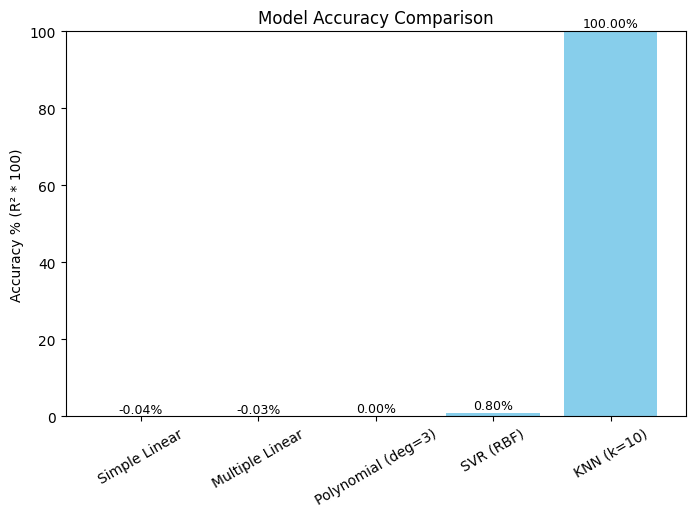

In [53]:
plt.figure(figsize=(8,5))
plt.bar(res["Model"], res["Accuracy %"], color="skyblue")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy % (R² * 100)")
plt.xticks(rotation=30)
plt.ylim(0, 100)
for i, v in enumerate(res["Accuracy %"]):
    plt.text(i, v + 1, f"{v:.2f}%", ha="center", fontsize=9)
plt.show()

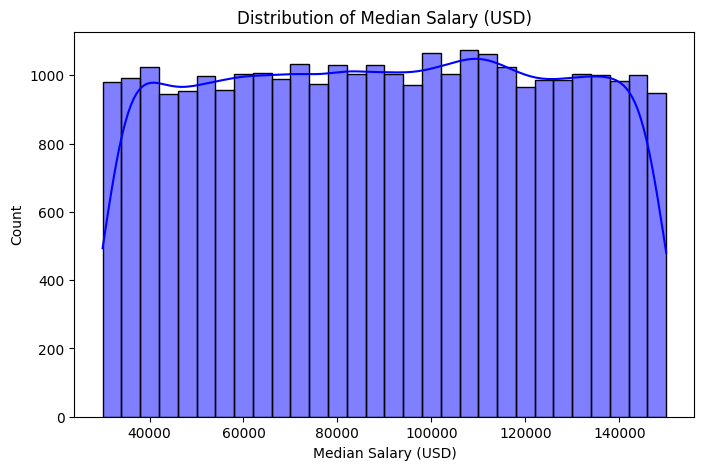

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("ai_job_trends_dataset.csv")

# 1. Distribution of Median Salary

plt.figure(figsize=(8,5))
sns.histplot(df["Median Salary (USD)"], kde=True, bins=30, color="blue")
plt.title("Distribution of Median Salary (USD)")
plt.xlabel("Median Salary (USD)")
plt.ylabel("Count")
plt.show()


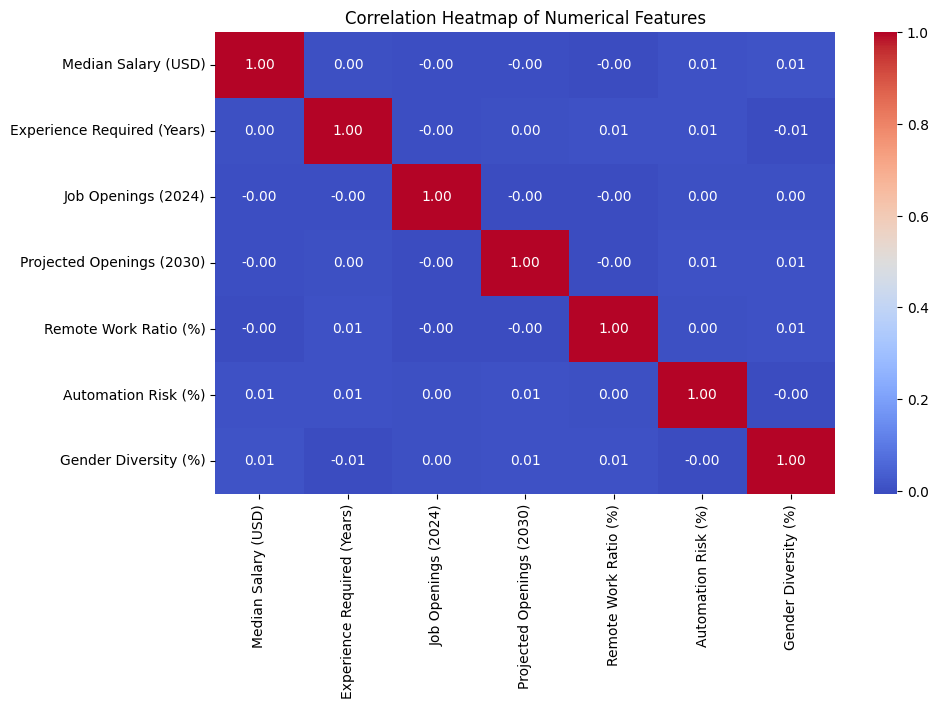

In [55]:
# 2. Correlation Heatmap

plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['float64','int64']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

/tmp/ipython-input-1601649107.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_industries.index, y=top_industries.values, palette="viridis")


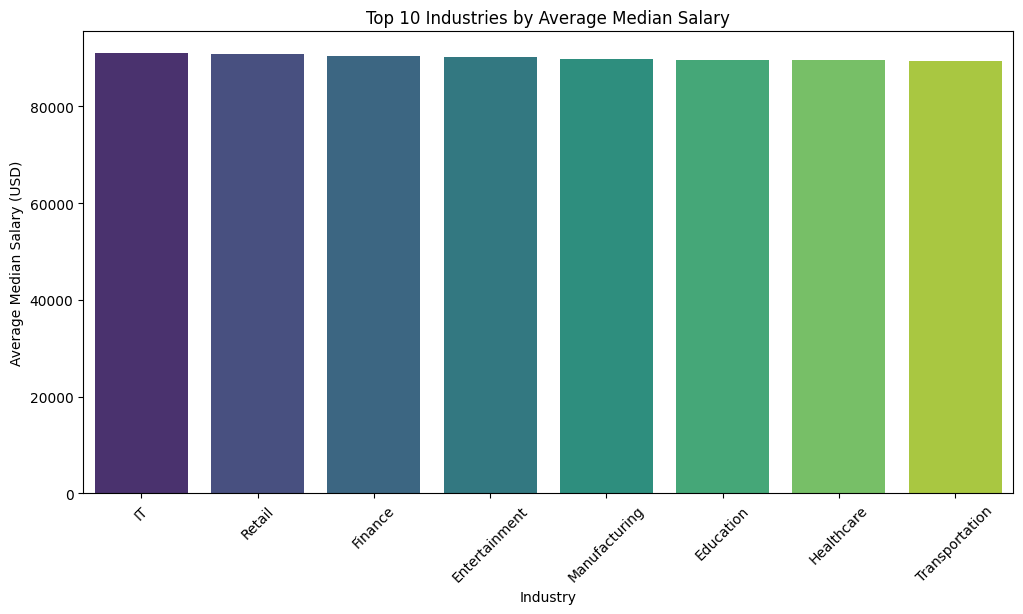

In [ ]:
                            # 3. Top 10 Industries by Salary

plt.figure(figsize=(12,6))
top_industries = df.groupby("Industry")["Median Salary (USD)"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_industries.index, y=top_industries.values, palette="viridis")
plt.title("Top 10 Industries by Average Median Salary")
plt.xticks(rotation=45)
plt.ylabel("Average Median Salary (USD)")
plt.show()

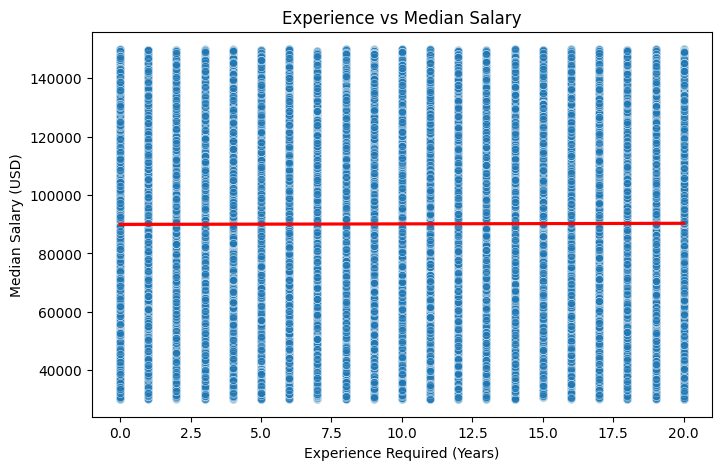

In [57]:
# 4. Experience vs Salary

plt.figure(figsize=(8,5))
sns.scatterplot(x="Experience Required (Years)", y="Median Salary (USD)", data=df, alpha=0.6)
sns.regplot(x="Experience Required (Years)", y="Median Salary (USD)", data=df, scatter=False, color="red")
plt.title("Experience vs Median Salary")
plt.show()

/tmp/ipython-input-572907721.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="AI Impact Level", y="Automation Risk (%)", data=df, palette="Set2")


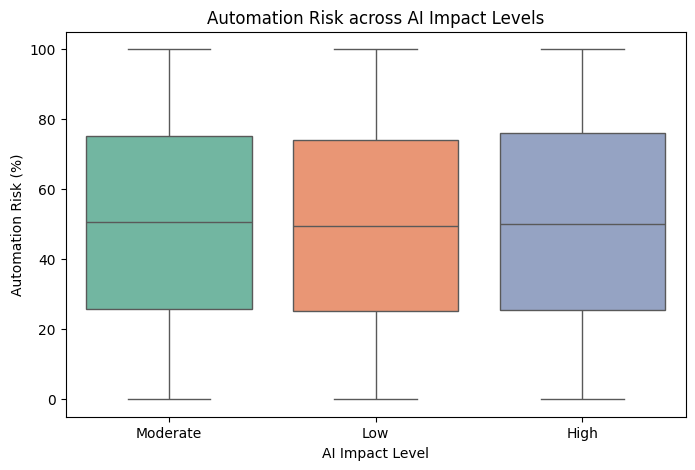

In [58]:
# 5. AI Impact Level vs Automation Risk

plt.figure(figsize=(8,5))
sns.boxplot(x="AI Impact Level", y="Automation Risk (%)", data=df, palette="Set2")
plt.title("Automation Risk across AI Impact Levels")
plt.show()

In [70]:
# Define features (same order as training)
features = [
    "Experience Required (Years)",
    "Job Openings (2024)",
    "Remote Work Ratio (%)",
    "Automation Risk (%)",
    "Gender Diversity (%)"
]

# Create new test sample (must include ALL features used for training)
test_sample = pd.DataFrame([{
    "Experience Required (Years)": 5,
    "Job Openings (2024)": 1200,
    "Remote Work Ratio (%)": 70,
    "Automation Risk (%)": 15,
    "Gender Diversity (%)": 45
}])

# Scale numeric feature columns
test_sample_scaled = scaler.transform(test_sample[features])

# Predict salary
predicted_salary = model.predict(test_sample_scaled)[0]

# Convert to Yes/No (using threshold)
threshold = 100000  # change this if you want another cutoff
prediction = "Yes" if predicted_salary >= threshold else "No"

print("Predicted Median Salary (USD):", predicted_salary)
print("Prediction (Above Threshold?):", prediction)

Predicted Median Salary (USD): 89312.84051777679
Prediction (Above Threshold?): No


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
